In [1]:
# Data Cleaning and analysis packages
import pandas as pd
import numpy as np


# NLP packages
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize


# Sats and Modeling packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Visualization packages
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings("ignore") 


pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

In [2]:
clean_df = pd.read_csv("data/clean_df.csv", index_col = 0)

In [3]:
clean_df.head(10)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0,1
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing,1,1
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",men's clothing,1,1
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,men's clothing,1,1
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,men's clothing,1,2
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,"['Perfect!', 'Comfy Time', '2020 tie dye trend...",['They were exactly what I was searching for! ...,men's clothing,1,2
6,Fruit of the Loom Men's Core Waffle Thermal Top,5.0,3.3,9.0,100.0,"['Love them', 'Love them - definitely a classi...",['These are very cozy! Body pair for me and my...,men's clothing,1,0
7,Champion Men's Powerblend Graphic Crew,22.5,4.7,377.0,93.0,"['Great sweater and price!', 'A good purchase'...",['I bought 2 of these for $19 each were anothe...,men's clothing,1,2
8,Free Assembly Men's Two-Pocket Flannel Shirt,18.0,4.9,22.0,100.0,"['Washes well. Soft. Good value.', 'Super su...",['My husband also likes this shirt. I washed a...,men's clothing,1,2
9,Lee Men’s Big & Tall Regular Fit Jeans,24.9,4.4,913.0,88.0,"['Great jeans', 'From 501s to Lee Jeans. Best ...",['I have bought Lee jeans for several years. T...,men's clothing,1,1


In [4]:
clean_df.rev_title[4]

'[\'Saved money and faster delivery that Amazon\', \'Very comfortable jeans\', \'Great fit - not too baggy, not too skinny!\', \'Very durable\', \'Pockets are ripped on everyone about eight months\', "Wrangler men\'s relaxed fit jeans", \'Tight in thigh, lighter color in front not solid\', \'Ripped within the first week.\', \'Poor Quality\', \'Mis-manufactured on purpose...STUPID\', \'Bad quality control.\', \'Wrangler jeans. Still the best.\', \'Not What I Wanted\', \'NOT A FAN\', \'Solid. Replaced all my old jeans with these.\', \'These are ok\', \'Good fit\', \'Practical and comfortable at a great price.\', "Wrangler doesn\'t miss", \'How they fit\']'

In [5]:

x = '[\'Saved money and faster delivery that Amazon\', \'Very comfortable jeans\', \'Great fit - not too baggy, not too skinny!\', \'Very durable\', \'Pockets are ripped on everyone about eight months\', "Wrangler men\'s relaxed fit jeans", \'Tight in thigh, lighter color in front not solid\', \'Ripped within the first week.\', \'Poor Quality\', \'Mis-manufactured on purpose...STUPID\', \'Bad quality control.\', \'Wrangler jeans. Still the best.\', \'Not What I Wanted\', \'NOT A FAN\', \'Solid. Replaced all my old jeans with these.\', \'These are ok\', \'Good fit\', \'Practical and comfortable at a great price.\', "Wrangler doesn\'t miss", \'How they fit\']'
' '.join(re.sub("([^0-9A-Za-z])"," ",x).split())

'Saved money and faster delivery that Amazon Very comfortable jeans Great fit not too baggy not too skinny Very durable Pockets are ripped on everyone about eight months Wrangler men s relaxed fit jeans Tight in thigh lighter color in front not solid Ripped within the first week Poor Quality Mis manufactured on purpose STUPID Bad quality control Wrangler jeans Still the best Not What I Wanted NOT A FAN Solid Replaced all my old jeans with these These are ok Good fit Practical and comfortable at a great price Wrangler doesn t miss How they fit'

In [6]:
## all funcitons live in the scripts folder
def clean_text(text):
    text.replace("\\n"," ")
    text =  ' '.join(re.sub("([^A-Za-z])"," ",text).split())
    return text.lower()

In [7]:
clean_df["rev_title"] = clean_df.rev_title.apply(clean_text)

### Now cleaning review_text column

In [8]:
clean_df["review_text"] = clean_df["review_text"].apply(clean_text)

In [9]:
clean_df.review_text[8]

'my husband also likes this shirt i washed and put in dryer before wearing came out almost free of wrinkles no shrinking that he noticed nice soft plaid need more colors the material is super soft and comfortable and the shirt has a good weight to it if i compared it to paper this is the card stock quality got for my husband and he loves it and wears it all the time now great fit soft well made he loves the blue these shirts are a very good quality fits great happily surprised by the high quality of the fabric and make of this shirt soft perfect fit and nice weight perfect for fall and winter super comfy high quality looks great will be ordering more of these shirts great quality fit and design nice quality thick and warm what i thought was a light weight flannel shirt for florida weather i received a thick and heavy flannel jacket a better description is necessary ordered a couple of free assembly flannels and am really pleased with what i received for the price point the design sense

In [10]:
clean_df.head(6)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,men's clothing,1,1
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,men's clothing,1,1
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,men's clothing,1,2
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,perfect comfy time tie dye trend online order ...,they were exactly what i was searching for nic...,men's clothing,1,2


# All text is now clean and ready to be used for feature engineering. 
Preprocessing steps:
- Tokenize and Lemmatize
- indentify stopwords
- Create a bag of words
- Textblob (subjectivity/polarity score)
- TfidfVectorizer # can be done right before train test split

In [11]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words=list(set(stopwords.words("english")))

In [12]:
# remove this line for final run! 
eda_stopwords = ["size", "color", "fit", "great", "pair", "right", "x", "xl" ]

stop_words=list(set(stopwords.words("english")))

stop_words.extend(eda_stopwords)

In [13]:
def tokenize(text):
    return nltk.word_tokenize(text)

In [14]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

In [15]:
def lemmatize_text(text):
     return [lemmatizer.lemmatize(word) for word in text]

In [16]:
def fdist(df, column):
    corpus = " ".join([" ".join(text) for text in df[column].to_list()])
    corpus = tokenize(corpus)
    fdist=FreqDist(corpus)
    print(f"Number of words in corpus: {len(fdist)}")
    fdist.plot(20);

In [17]:
clean_df["tokenized"] = clean_df.review_text.apply(tokenize)

Number of words in corpus: 10290


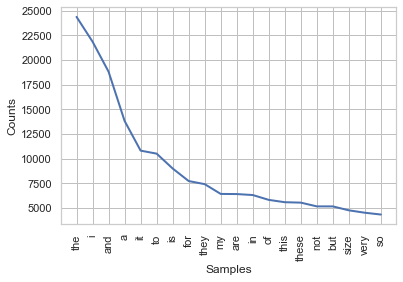

In [18]:
fdist(clean_df, "tokenized")

In [19]:
clean_df["rem_stop"] = clean_df.tokenized.apply(remove_stopwords)

Number of words in corpus: 10135


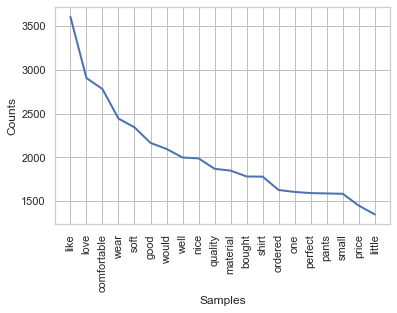

In [20]:
fdist(clean_df, "rem_stop")

In [21]:
clean_df["lemma_words"] = clean_df.rem_stop.apply(lemmatize_text)

Number of words in corpus: 9082


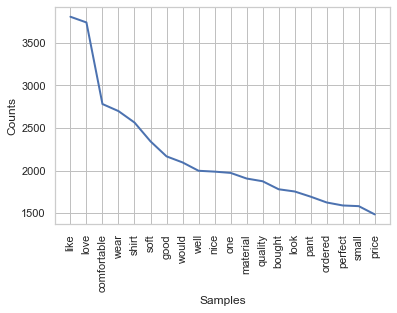

In [22]:
fdist(clean_df, "lemma_words")

In [23]:
clean_df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go..."
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,men's clothing,1,1,"[if, you, like, big, men, s, style, wearing, j...","[like, big, men, style, wearing, jeans, would,...","[like, big, men, style, wearing, jean, would, ..."
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,men's clothing,1,1,"[my, husband, loves, these, jeans, and, goes, ...","[husband, loves, jeans, goes, quite, lot, thro...","[husband, love, jean, go, quite, lot, througho..."
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,men's clothing,1,2,"[fit, well, great, price, same, jeans, i, was,...","[well, price, jeans, buying, amazon, lot, less...","[well, price, jean, buying, amazon, lot, le, m..."


In [24]:
no_rec = clean_df[clean_df.target == 0]
yes_rec = clean_df[clean_df.target == 1]

In [25]:
no_rec.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.00,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
10,Eddie Bauer Men's CirrusLite Down Jacket,49.98,4.4,16.0,44.0,don t be fooled by the low price great lightwe...,this jacket has really impressed me it s so li...,men's clothing,0,1,"[this, jacket, has, really, impressed, me, it,...","[jacket, really, impressed, light, like, plast...","[jacket, really, impressed, light, like, plast..."


In [26]:
text = no_rec["lemma_words"].values
text = " ".join(" ".join(word) for word in text)

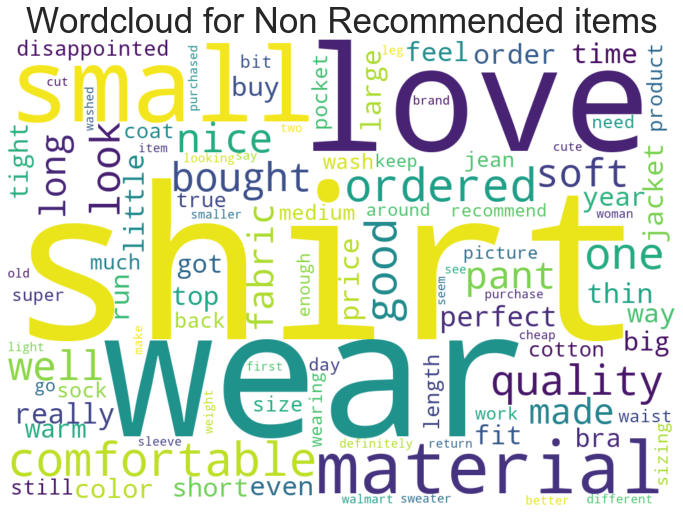

In [27]:
fig, ax = plt.subplots(figsize=(12,17))

wordcloud = WordCloud(max_words=100,collocations=False, width=1000, height=700, background_color="white", random_state=0).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Non Recommended items", fontsize = 35)
plt.show()

In [28]:
text =yes_rec["lemma_words"].values
text = " ".join(" ".join(word) for word in text)

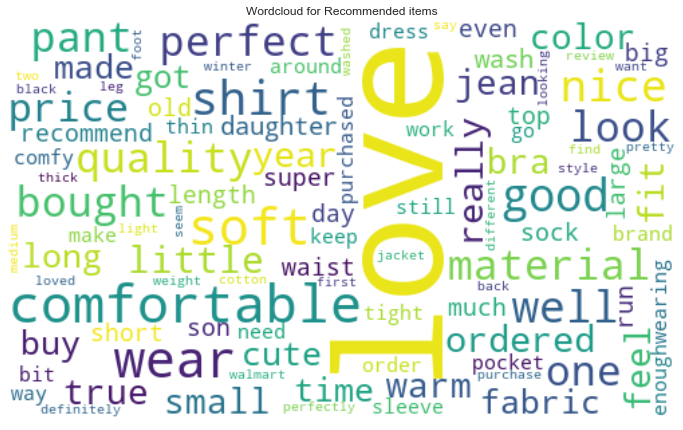

In [29]:
fig, ax = plt.subplots(figsize=(12,17))

wordcloud = WordCloud(max_words=100,collocations=False, width=500, height=300, background_color="white", random_state =0).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Recommended items")
plt.show()

In [30]:
clean_df.to_csv("data/sectioning_df.csv")

Adding new stopwords found from the word cloud

In [32]:
eda_stopwords = ["size", "color", "fit", "great", "pair", "right", "x", "xl", "one","way", "definitely" ]

stop_words=list(set(stopwords.words("english")))

stop_words.extend(eda_stopwords)

In [33]:
import gensim

In [34]:
clean_df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go..."
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,men's clothing,1,1,"[if, you, like, big, men, s, style, wearing, j...","[like, big, men, style, wearing, jeans, would,...","[like, big, men, style, wearing, jean, would, ..."
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,men's clothing,1,1,"[my, husband, loves, these, jeans, and, goes, ...","[husband, loves, jeans, goes, quite, lot, thro...","[husband, love, jean, go, quite, lot, througho..."
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,men's clothing,1,2,"[fit, well, great, price, same, jeans, i, was,...","[well, price, jeans, buying, amazon, lot, less...","[well, price, jean, buying, amazon, lot, le, m..."


In [35]:
#This will tag every unique word in apple_tweets and give it an 'id' number. 
dictionary = gensim.corpora.Dictionary(clean_df["lemma_words"])

In [36]:
#confirming output of the word tags
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10: #only displaying first 10 
        break
print('Total length of word/id pairs: {}'.format(len(dictionary)))

0 another
1 bought
2 buy
3 friday
4 going
5 last
6 perfect
7 texas
8 winter
9 year
10 absolutely
Total length of word/id pairs: 9082


In [37]:
# dictionary is then filtered to remove that appear in more than 50% 
dictionary.filter_extremes(no_above=0.5)

In [38]:
# applying the dictionary to the apple tweets to create a sparce matrix/vector (BOW)
bag_of_words = [dictionary.doc2bow(doc) for doc in clean_df["lemma_words"]]

In [39]:
clean_df.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go..."


In [40]:
clean_df["lemma_words"]

0       [bought, last, year, going, buy, another, frid...
1       [like, wrangler, pant, exactly, body, also, go...
2       [like, big, men, style, wearing, jean, would, ...
3       [husband, love, jean, go, quite, lot, througho...
4       [well, price, jean, buying, amazon, lot, le, m...
                              ...                        
1144    [small, way, little, average, year, old, cute,...
1145    [make, sure, go, shirt, run, small, pant, fine...
1146    [cutest, outfit, top, little, thicker, tshirt,...
1147    [nice, plush, jacket, young, girl, nice, weigh...
1148    [cute, tye, dye, awesome, sizing, little, big,...
Name: lemma_words, Length: 1149, dtype: object

In [41]:
bag_of_words[5]

[(0, 1),
 (1, 3),
 (3, 2),
 (13, 1),
 (28, 2),
 (30, 2),
 (31, 1),
 (32, 1),
 (33, 1),
 (36, 2),
 (48, 3),
 (59, 1),
 (65, 1),
 (71, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (84, 1),
 (88, 1),
 (91, 1),
 (93, 1),
 (94, 1),
 (96, 1),
 (97, 2),
 (102, 1),
 (105, 1),
 (108, 1),
 (111, 1),
 (112, 1),
 (118, 2),
 (135, 1),
 (137, 1),
 (141, 1),
 (143, 1),
 (150, 1),
 (152, 2),
 (156, 1),
 (159, 1),
 (194, 1),
 (197, 1),
 (206, 1),
 (214, 2),
 (222, 1),
 (223, 1),
 (227, 1),
 (228, 1),
 (229, 8),
 (234, 4),
 (237, 1),
 (240, 1),
 (252, 2),
 (255, 2),
 (262, 3),
 (264, 1),
 (266, 1),
 (273, 2),
 (277, 1),
 (281, 1),
 (284, 2),
 (295, 1),
 (303, 2),
 (315, 1),
 (322, 1),
 (324, 1),
 (327, 2),
 (329, 1),
 (335, 2),
 (351, 5),
 (354, 1),
 (359, 1),
 (376, 1),
 (380, 1),
 (381, 1),
 (395, 1),
 (400, 1),
 (407, 1),
 (413, 2),
 (419, 1),
 (422, 1),
 (424, 1),
 (441, 1),
 (450, 2),
 (453, 1),
 (455, 1),
 (456, 1),
 (460, 1),
 (464, 1),
 (468, 1),
 (473, 1),
 (475, 1),
 (480, 3),
 (501, 1),
 (504

In [42]:
def list_to_str(text):
    return ", ".join(text)

In [43]:
clean_df["delisted"] = clean_df["lemma_words"].apply(list_to_str)

In [44]:
tfidfconverter = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,2), max_features=2000)  

X = tfidfconverter.fit_transform(clean_df.delisted.values).toarray()

tfidf_df = pd.DataFrame(X)

In [45]:
# clean_df["section"] = clean_df["section"].astype("category")

In [46]:
# clean_df["section_cat"] = clean_df["section"].cat.codes

In [47]:
encoder = OneHotEncoder(handle_unknown="ignore")
coded_cat=pd.DataFrame(encoder.fit_transform(clean_df[["section"]]).toarray())


In [48]:
coded_cat.rename(columns={0:"boys'",1:"girls'", 2:"men's", 3:"women's"},inplace=True)

In [49]:
frames = [clean_df, coded_cat, tfidf_df]

In [50]:
df = pd.concat(frames, axis=1)

In [51]:
df.shape

(1149, 2018)

In [52]:
interest = ["price", "overall_rating", "recommend", "rating_bin", "target"]

In [55]:
corr = df[interest].corr()

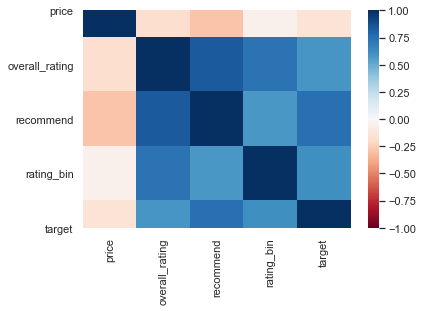

In [56]:
sns.heatmap(corr, cmap = "RdBu", vmin = -1, vmax= 1)

# Train Test Split

In [57]:
drop_features = ["item_name","overall_rating", "recommend", "rev_title", "review_text", "section", "tokenized", "rem_stop", "lemma_words", "delisted", "target"]

In [58]:
X = df.drop(columns = drop_features)
y = df["target"]

In [59]:
# X = clean_df.drop(columns = drop_features)
# y = clean_df.target

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
print(X_train.shape, y_train.shape)

(919, 2007) (919,)


In [62]:
X_train.head()

,price,num_rating,rating_bin,boys',girls',men's,women's,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,...,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
1072,11.94,13.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144494,0.0,0.0,0.0,0.0,0.0,0.083119,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.056359,0.130154,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.084427,0.0,0.0,0.0,0.0,0.0,0.00000,0.066332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,10.00,3.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.200665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165994,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107751,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084131,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.083014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,

# Logistic Regression

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty="l2", random_state = 0,n_jobs=-1, class_weight="balanced")
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=0)

In [64]:
y_pred_lr = logreg.predict(X_test)
print("F1 score is:", metrics.f1_score(y_test, y_pred_lr))
print("-"*60)                         
print(classification_report(y_test, y_pred_lr))

F1 score is: 0.8580441640378549
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.73      0.69        67
           1       0.88      0.83      0.86       163

    accuracy                           0.80       230
   macro avg       0.76      0.78      0.77       230
weighted avg       0.81      0.80      0.81       230



In [65]:
print(logreg.coef_, logreg.intercept_)

[[-3.32126647e-02 -1.99482517e-04  2.35918714e+00 ... -9.71778718e-02
   8.55840820e-02  4.44780770e-01]] [-1.40124421]


In [66]:
coef_df = pd.DataFrame(logreg.coef_[0], X.columns, columns=["coefficients"]).sort_values(by="coefficients", ascending =False)[:10]

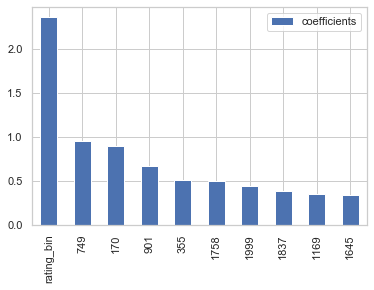

In [67]:
coef_df.plot(kind="bar")

In [68]:
dataset = [d.split() for d in df.delisted]
vocab = gensim.corpora.Dictionary(dataset)


In [69]:
vocab[744]

'situation,'

# MultinomialNB

In [70]:
Multi_nb = MultinomialNB()
Multi_nb.fit(X_train, y_train)

MultinomialNB()

In [71]:
y_pred_NB = Multi_nb.predict(X_test)
multi_NB_cm = confusion_matrix(y_test, y_pred_NB)
print("F1 score is:", metrics.f1_score(y_test, y_pred_NB, average="macro"))
print("-"*60)                         
print(classification_report(y_test, y_pred_NB))

F1 score is: 0.5972189550171201
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.31      0.39        67
           1       0.76      0.87      0.81       163

    accuracy                           0.71       230
   macro avg       0.63      0.59      0.60       230
weighted avg       0.68      0.71      0.69       230



# Bernoulli Naive Bayes

In [72]:
B_nb = BernoulliNB(alpha=0.1)
B_nb.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

In [73]:
y_pred_Bnb = B_nb.predict(X_test)
BNB_cm = confusion_matrix(y_test, y_pred_Bnb)
print("F1 score is:", metrics.f1_score(y_test, y_pred_Bnb, average="micro"))
print("-"*60)                         
print(classification_report(y_test, y_pred_Bnb))

F1 score is: 0.7434782608695654
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.57      0.56        67
           1       0.82      0.82      0.82       163

    accuracy                           0.74       230
   macro avg       0.69      0.69      0.69       230
weighted avg       0.74      0.74      0.74       230



# Random Forest Classifier

In [74]:
rfc_classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0, class_weight = "balanced")

In [75]:
rfc_classifier.fit(X_train, y_train)
y_pred_RF = rfc_classifier.predict(X_test)
print("F1 score is:", metrics.f1_score(y_test, y_pred_RF))
print("-"*100)                         
print(classification_report(y_test, y_pred_RF))
print("-"*100)
RFC_cm = confusion_matrix(y_test, y_pred_RF)
print(RFC_cm)

F1 score is: 0.8802228412256268
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.43      0.57        67
           1       0.81      0.97      0.88       163

    accuracy                           0.81       230
   macro avg       0.83      0.70      0.73       230
weighted avg       0.82      0.81      0.79       230

----------------------------------------------------------------------------------------------------
[[ 29  38]
 [  5 158]]


In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
rfc = RandomForestClassifier(n_estimators = 300, criterion = "entropy",
                             random_state = 0, verbose=1, n_jobs=-1, class_weight="balanced")

In [78]:
param_dict={'min_samples_leaf':range(1,10,1), 'max_depth': range(10,20,1)}

In [79]:
grid_tree = GridSearchCV(rfc, param_dict, cv=5, scoring="f1", verbose=2, n_jobs=-1)


grid_tree.fit(X_train, y_train)
#rfc.fit(X_train_tfidf, y_train_tfidf)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              n_estimators=300, n_jobs=-1,
                                              random_state=0, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 20),
                         'min_samples_leaf': range(1, 10)},
             scoring='f1', verbose=2)

In [80]:
grid_tree_pred = grid_tree.predict(X_test)
print("F1 score is:", metrics.f1_score(y_test, grid_tree_pred))
print("-"*60)                         
print(classification_report(y_test, grid_tree_pred))
print("-"*100)
Grid_cm = confusion_matrix(y_test, grid_tree_pred)
print(Grid_cm)

F1 score is: 0.8947368421052632
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.61      0.69        67
           1       0.85      0.94      0.89       163

    accuracy                           0.84       230
   macro avg       0.83      0.78      0.79       230
weighted avg       0.84      0.84      0.84       230

----------------------------------------------------------------------------------------------------
[[ 41  26]
 [ 10 153]]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished


In [81]:
print(grid_tree.best_params_)
print("-"*100)
print(grid_tree.best_estimator_)
print("-"*100)
print(grid_tree.best_estimator_.feature_importances_)

{'max_depth': 10, 'min_samples_leaf': 4}
----------------------------------------------------------------------------------------------------
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=4, n_estimators=300,
                       n_jobs=-1, random_state=0, verbose=1)
----------------------------------------------------------------------------------------------------
[0.0084184  0.00399221 0.08172934 ... 0.00015807 0.         0.00014397]


# Overall Scores

In [82]:
# Logistic Regression:
print("Logistic Regression F1 score is:", metrics.f1_score(y_test, y_pred_lr))
# Multinominal NB
print("Multinominal NB F1 score is:", metrics.f1_score(y_test, y_pred_NB))
# Bernoulli NB
print("Bernoulli F1 score is:", metrics.f1_score(y_test, y_pred_Bnb))
# Random Forest
print("Random Forest F1 score is:", metrics.f1_score(y_test, y_pred_RF))
# Grid Search
print("GridSearchCV F1 score is:", metrics.f1_score(y_test, grid_tree_pred))


Logistic Regression F1 score is: 0.8580441640378549
Multinominal NB F1 score is: 0.809116809116809
Bernoulli F1 score is: 0.8184615384615386
Random Forest F1 score is: 0.8802228412256268
GridSearchCV F1 score is: 0.8947368421052632


# Feature importance

In [83]:
d = {'Stats':X.columns,'FI':grid_tree.best_estimator_.feature_importances_}

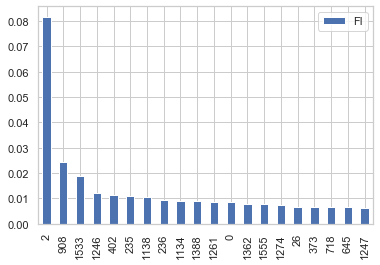

In [93]:
data = pd.DataFrame(d)
data = data.sort_values(by='FI', ascending=False)
data[:20].plot(kind="bar")

In [94]:
feat_imp = data[:10]

In [95]:
feat_imp

,Stats,FI
2,rating_bin,0.081729
908,901,0.024383
1533,1526,0.019010
1246,1239,0.012247
402,395,0.011387
235,228,0.011020
1138,1131,0.010465
236,229,0.009415
1134,1127,0.008937
1388,1381,0.008844


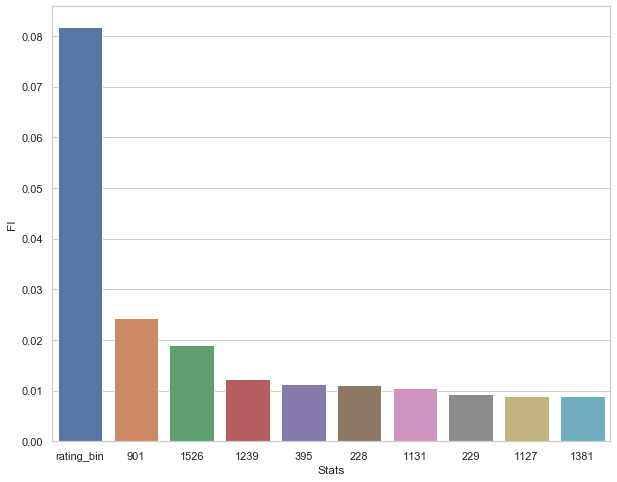

In [87]:
x=feat_imp.Stats.astype("str")
y=feat_imp.FI

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=x, y=y, data = feat_imp)

In [88]:
dataset = [d.split() for d in df.delisted]
vocab = gensim.corpora.Dictionary(dataset)


In [92]:
vocab[901]

'maybe,'

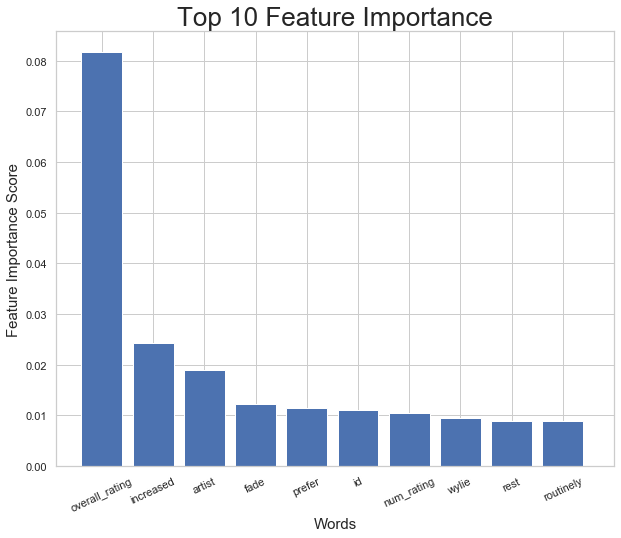

In [124]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x=x, height=y, data = feat_imp)

x = ['overall_rating', 'increased', 'artist', 'fade', 'prefer', 'id', 'num_rating', 'wylie', 'rest', 'routinely']
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


ax.set_xticks(l)
ax.set_xticklabels(x)
plt.xticks(rotation=25)
plt.title("Top 10 Feature Importance", fontsize=26)
plt.ylabel("Feature Importance Score", fontsize=15)
plt.xlabel("Words", fontsize=15);





In [135]:
clean_df[clean_df["delisted"].str.contains("increased")]

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words,delisted
9,Lee Men’s Big & Tall Regular Fit Jeans,24.90,4.4,913.0,88.0,great jeans from s to lee jeans best conversio...,i have bought lee jeans for several years the ...,men's clothing,1,1,"[i, have, bought, lee, jeans, for, several, ye...","[bought, lee, jeans, several, years, two, purc...","[bought, lee, jean, several, year, two, purcha...","bought, lee, jean, several, year, two, purchas..."
41,Lee Men's Relaxed Fit Jeans,24.90,4.4,1049.0,89.0,great jeans from s to lee jeans best conversio...,i have bought lee jeans for several years the ...,men's clothing,1,1,"[i, have, bought, lee, jeans, for, several, ye...","[bought, lee, jeans, several, years, two, purc...","[bought, lee, jean, several, year, two, purcha...","bought, lee, jean, several, year, two, purchas..."
54,Fruit of The loom Men's Waffle Baselayer Henle...,7.97,4.4,155.0,90.0,fits great looks great a good looking thermal ...,this is a review of the fruit of the loom men ...,men's clothing,1,1,"[this, is, a, review, of, the, fruit, of, the,...","[review, fruit, loom, men, soft, waffle, basel...","[review, fruit, loom, men, soft, waffle, basel...","review, fruit, loom, men, soft, waffle, basela..."
295,PajamaMania Women's Cotton Flannel Long Sleeve...,35.99,4.3,125.0,90.0,quality fabric colors small to xl soft comfy c...,pajamamania women s flannel long sleeve pajama...,women's clothing,1,1,"[pajamamania, women, s, flannel, long, sleeve,...","[pajamamania, women, flannel, long, sleeve, pa...","[pajamamania, woman, flannel, long, sleeve, pa...","pajamamania, woman, flannel, long, sleeve, paj..."
413,Radiant by Vanity Fair Women's Full Coverage C...,11.80,4.3,427.0,89.0,happy with my new sports bras no more bouncing...,they are so soft and very nice i ve been weari...,women's clothing,1,1,"[they, are, so, soft, and, very, nice, i, ve, ...","[soft, nice, wearing, hanes, underwire, many, ...","[soft, nice, wearing, hanes, underwire, many, ...","soft, nice, wearing, hanes, underwire, many, y..."
420,"Hanes Women's Cotton Hi-Cut Panties, 10-Pack",15.47,3.9,929.0,73.0,i like this underwear a lot don t like the low...,i like these very much and have been buying th...,women's clothing,0,0,"[i, like, these, very, much, and, have, been, ...","[like, much, buying, years, like, way, seem, l...","[like, much, buying, year, like, way, seem, la...","like, much, buying, year, like, way, seem, las..."


In [130]:
clean_df.iloc[9].review_text

'i have bought lee jeans for several years the two pair that i purchased most recently had noticeably crooked seams i called customer service which emailed me a shipping label the replacement jeans arrived in about a week and they were perfect the company really stands behind its products which is a definite plus i unfortunately wasn t around during the time when all denim was a heavyweight fabric nowadays it seems like most denim retailers sell paper thin denim and i am not a fan so for a while i only work s until i actually decided to examine a pair of lee regular straights and if you re looking for a jean that is built tough with a heavyweight denim these are it i love that they tell you how many oz you re getting in each pair i love the lazy s back pocket details and just the overall construction of these jeans lee jeans fit me perfectly and i needed a few spare pair after going through about pairs at the store looking for the right shade and size i through up my arms and just deci

# SMOTE

In [91]:
# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=0)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# columns = X_train.columns

# os_data_X,os_data_y=os.fit_sample(X_train, y_train)

# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

# os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
# print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

ValueError: Found input variables with inconsistent numbers of samples: [1149, 10]

#### figure out/exp class imbalance algos (upsample)
#### change hyperperameters (weight = balanced, try bigrams and trigrams)
#### log reg for coef. (+ or -) 
#### LDA topic modeling



In [ ]:
clean_df.head(2)

In [ ]:
# doc2vec
# word2vec
# mean vectors 

# SVM models 


In [ ]:
#clean_df.to_csv("data/full_clean_df.csv")